<a href="https://colab.research.google.com/github/Shreeja7Sheth/ESRNN-/blob/main/ESRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ESRNN

     |████████████████████████████████| 42 kB 953 kB/s 


In [ ]:
from ESRNN import ESRNN
from ESRNN.m4_data import *
from ESRNN.utils_evaluation import evaluate_prediction_owa
from ESRNN.utils_visualization import plot_grid_prediction

In [ ]:
from ESRNN.m4_data import prepare_m4_data


In [ ]:
print(prepare_m4_data)

<function prepare_m4_data at 0x7f3204fd29e0>


#Downloading data

In [ ]:
X_train_df, y_train_df, X_test_df, y_test_df = prepare_m4_data(
   dataset_name="Hourly", 
   directory="./data", 
   num_obs=414)



Preparing Hourly dataset
Preparing Naive2 Hourly dataset predictions


In [ ]:
# Instantiate model
model = ESRNN(max_epochs=5, freq_of_test=1, batch_size=32, 
              learning_rate=0.02, per_series_lr_multip=0.5,
              lr_scheduler_step_size=7, lr_decay=0.5, 
              gradient_clipping_threshold=50, 
              rnn_weight_decay=0.0, noise_std=0.001, 
              level_variability_penalty=30, 
              testing_percentile=50, training_percentile=50,
              ensemble=True, max_periods=371, 
              seasonality=[24, 168], input_size=24, output_size=48,
              cell_type='LSTM', state_hsize=40, 
              dilations=[[1, 4, 24, 168]], add_nl_layer=False,
              random_seed=1, device='cpu')

In [ ]:
# Fit model
# If y_test_df is provided the model 
# will evaluate predictions on this 
# set every freq_test epochs
model.fit(X_train_df, y_train_df)



Infered frequency: H
=============== Training ESRNN  ===============

========= Epoch 0 finished =========
Training time: 51.86832
Training loss (50 prc): 0.70241
========= Epoch 1 finished =========
Training time: 44.44737
Training loss (50 prc): 0.59290
========= Epoch 2 finished =========
Training time: 45.24396
Training loss (50 prc): 0.53480
========= Epoch 3 finished =========
Training time: 45.48604
Training loss (50 prc): 0.49682
========= Epoch 4 finished =========
Training time: 44.75827
Training loss (50 prc): 0.46950
Train finished! 



In [ ]:
# Predict on test set
y_hat_df = model.predict(X_test_df)

# Evaluate predictions
final_owa, final_mase, final_smape = evaluate_prediction_owa(y_hat_df, y_train_df, 
                                                             X_test_df, y_test_df,
                                                             naive2_seasonality=24)

===============  Model evaluation  ==============
OWA: 0.985 
SMAPE: 15.619 
MASE: 2.686 


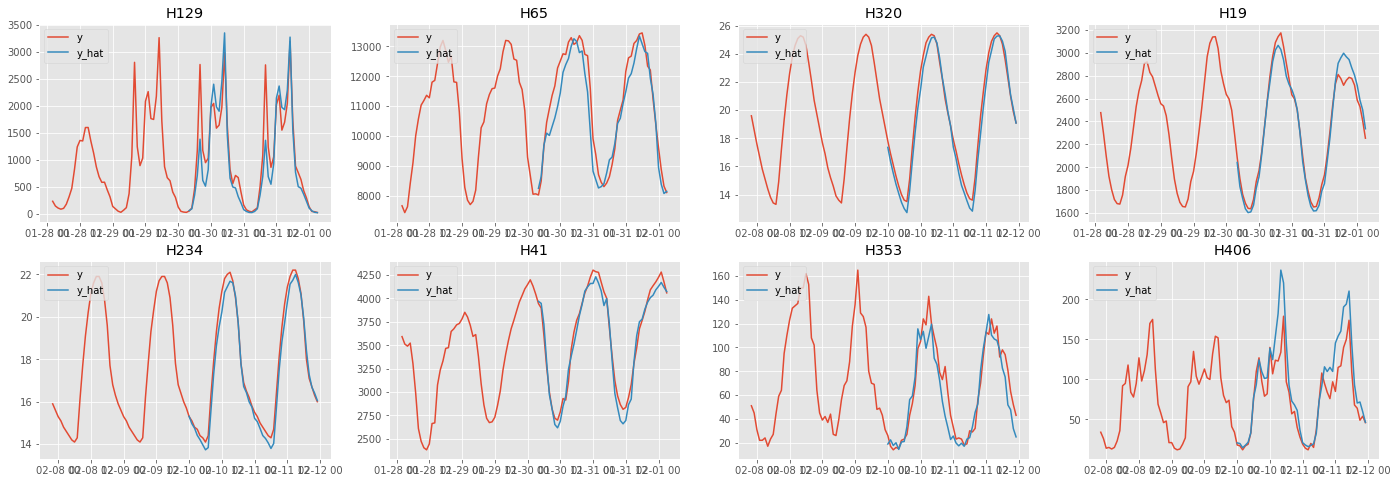

In [ ]:
unique_ids = ['H129', 'H41', 'H406', 'H234', 
              'H65', 'H19', 'H320', 'H353']

plot_preds = pd.concat([y_train_df.groupby('unique_id').tail(50), 
                        y_test_df], 
                       sort=True)
plot_grid_prediction(plot_preds, y_hat_df, 
                     unique_ids=unique_ids)

# New section